# Shortlinks

1. [Code from Customer Analysis Round 2](#car2)
2. [Solutions for Customer Analysis Round 3](#car3)
3. [Solutions for Customer Analysis Round 4 (new!)](#car4)

# Code from Customer Analysis Round 2 (run this first) <a class="anchor" id="car2"></a>

In [9]:
import pandas as pd
import numpy as np

data=pd.read_csv('marketing_customer_analysis.csv')    # import csv file
data.head()   

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## 1. Show the dataframe shape

In [10]:
data.shape

(9134, 24)

In [11]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

## 2. Standardize Header Names

In [12]:
# lower the column names and replace whitespaces with _'s
data.columns=[column.lower().replace(' ', '_') for column in data.columns]

data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

## 3. Which columns are numerical?

In [13]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [14]:
data._get_numeric_data().columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

## 4. Which columns are categorical?

In [15]:
# we just take the numerical column names, drop them from the original dataframe,
# and we should end up with only categoricals
data.drop(columns=data._get_numeric_data().columns).columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

## 5. Check and deal with NaN values 

In [16]:
data.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

clean of null values!
Otherwise we would have done:

In [17]:
data.isna().sum()
round(data.isna().sum()/len(data),4)*100  # shows the percentage of null values in a column

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

In [18]:
data=data.drop(columns=['vehicle_size'])  # drop a column  (or multiple columns)
data=data.dropna()   # drop rows with nan values
data.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
dtype: int64

## 6. Datetime format

In [19]:
data['effective_to_date'].dtype
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'], errors='coerce')
data['effective_to_date'].dtype
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car


## 7. Bonus: Put everything in a function 

In [20]:
def clean_data(df):
    df.columns=[e.lower().replace(' ', '_') for e in df.columns]
    print(df.columns)
    df=df.drop(columns=['vehicle_size'])
    df=df.dropna()
    df['effective_to_date']=pd.to_datetime(df['effective_to_date'], errors='coerce')
    return df

In [21]:
# start fresh:
data=pd.read_csv('marketing_customer_analysis.csv')

clean_data(data)

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car


# Code for Customer Analysis Round 3  <a class="anchor" id="car3"></a>

### show DataFrame info

In [22]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

### Describe

In [23]:
data.describe()

data.describe(include='all')

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
count,9134,9134,9134.000000,9134,9134,9134,9134,9134,9134,9134.000000,...,9134.000000,9134.000000,9134.000000,9134,9134,9134,9134,9134.000000,9134,9134
unique,9134,5,NaN,2,3,5,59,5,2,NaN,...,NaN,NaN,NaN,3,9,4,4,NaN,6,3
top,IM55696,California,NaN,No,Basic,Bachelor,1/10/11,Employed,F,NaN,...,NaN,NaN,NaN,Personal Auto,Personal L3,Offer1,Agent,NaN,Four-Door Car,Medsize
freq,1,3150,NaN,7826,5568,2748,195,5698,4658,NaN,...,NaN,NaN,NaN,6788,3426,3752,3477,NaN,4621,6424
mean,NaN,NaN,8004.940475,NaN,NaN,NaN,NaN,NaN,NaN,37657.380009,...,48.064594,0.384388,2.966170,NaN,NaN,NaN,NaN,434.088794,NaN,NaN
std,NaN,NaN,6870.967608,NaN,NaN,NaN,NaN,NaN,NaN,30379.904734,...,27.905991,0.910384,2.390182,NaN,NaN,NaN,NaN,290.500092,NaN,NaN
min,NaN,NaN,1898.007675,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,0.099007,NaN,NaN
25%,NaN,NaN,3994.251794,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,24.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,272.258244,NaN,NaN
50%,NaN,NaN,5780.182197,NaN,NaN,NaN,NaN,NaN,NaN,33889.500000,...,48.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,383.945434,NaN,NaN
75%,NaN,NaN,8962.167041,NaN,NaN,NaN,NaN,NaN,NaN,62320.000000,...,71.000000,0.000000,4.000000,NaN,NaN,NaN,NaN,547.514839,NaN,NaN


### Show plot of the total number of responses

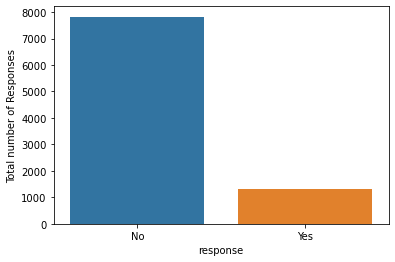

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.countplot(x = 'response', data=data)
plt.ylabel('Total number of Responses')
plt.show()

### Show a plot of the response rate by the sales channel.

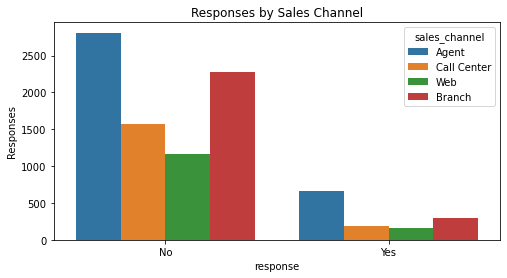

In [25]:
plt.figure(figsize=(8,4))
sns.countplot(x='response', hue='sales_channel', data=data)
plt.ylabel('Responses')
plt.title('Responses by Sales Channel')
plt.show()

### ~~Show a plot of the response rate by the total claim amount.~~ Show a plot of the distribution of the total claim amount, broken down by response kind. Try a boxplot and distribution plot, for each response kind. For the distribution plot, try to plot both kinds of responses in one chart (seaborns histplot, using the 'hue' parameter).

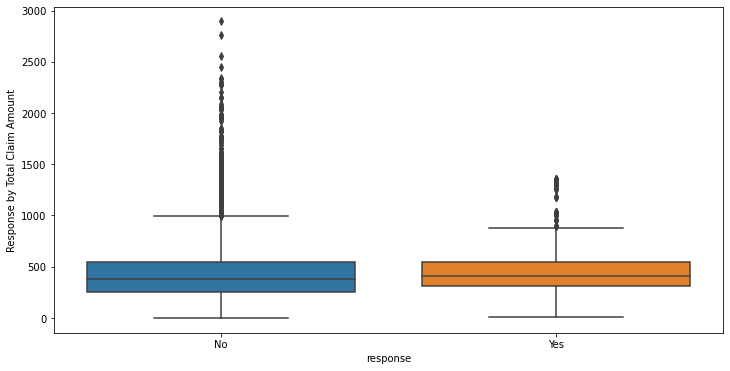

In [26]:
plt.figure(figsize=(12,6))
sns.boxplot(y='total_claim_amount' , x='response', data=data)
plt.ylabel('Response by Total Claim Amount')
plt.show()

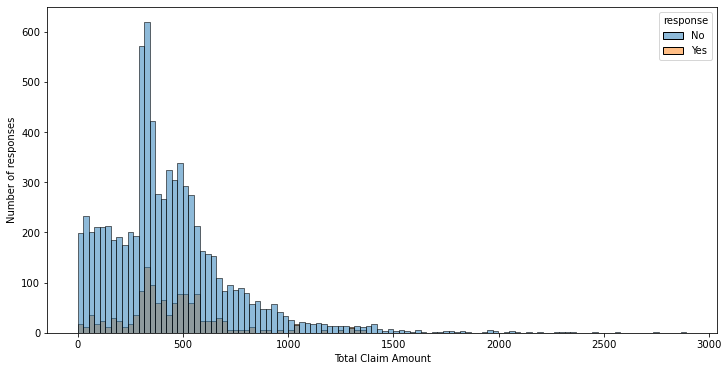

In [27]:
# we can work with
# plt.figure(figsize=(12,10))
# but we need a bit more freedom regarding placing the plot on our figure
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x='total_claim_amount' , hue='response', data=data, ax=ax)
plt.ylabel('Number of responses')
plt.xlabel('Total Claim Amount')
plt.show()

### ~~Show a plot of the response rate by income.~~ Create similar plots like in the task before, but for `Income`

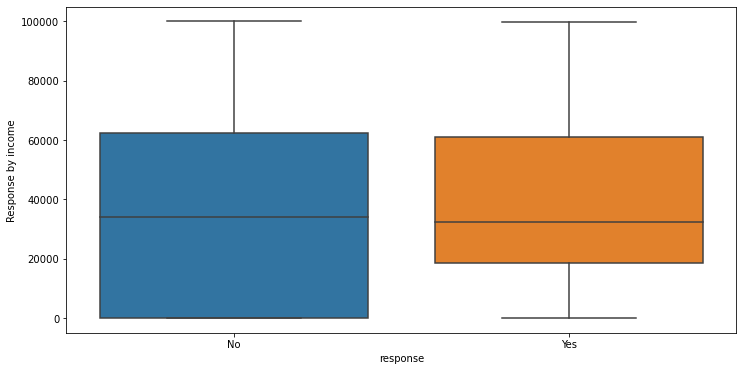

In [28]:
plt.figure(figsize=(12,6))
sns.boxplot(y='income' , x='response', data=data)
plt.ylabel('Response by income')
plt.show()

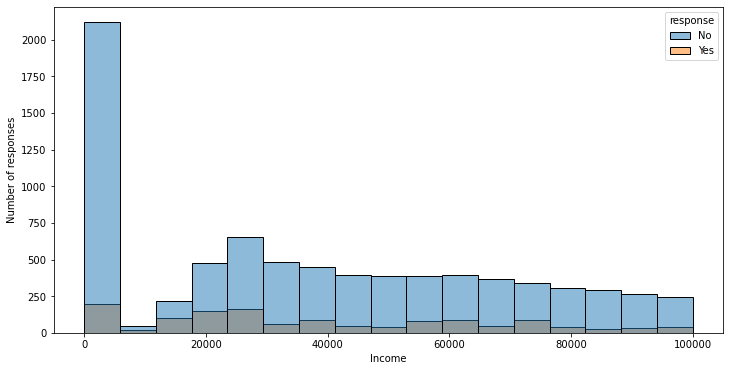

In [29]:
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x='income' , hue='response', data=data, ax=ax)
plt.ylabel('Number of responses')
plt.xlabel('Income')
plt.show()

# Create a scatterplot between 'total claim amount' and 'income'. Play around with the settings of the scatterplot (markersize?) and try to identify more features within the data just visually. You can also try different seaborn plots. Check: https://www.python-graph-gallery.com/134-how-to-avoid-overplotting-with-python

<AxesSubplot:xlabel='total_claim_amount', ylabel='income'>

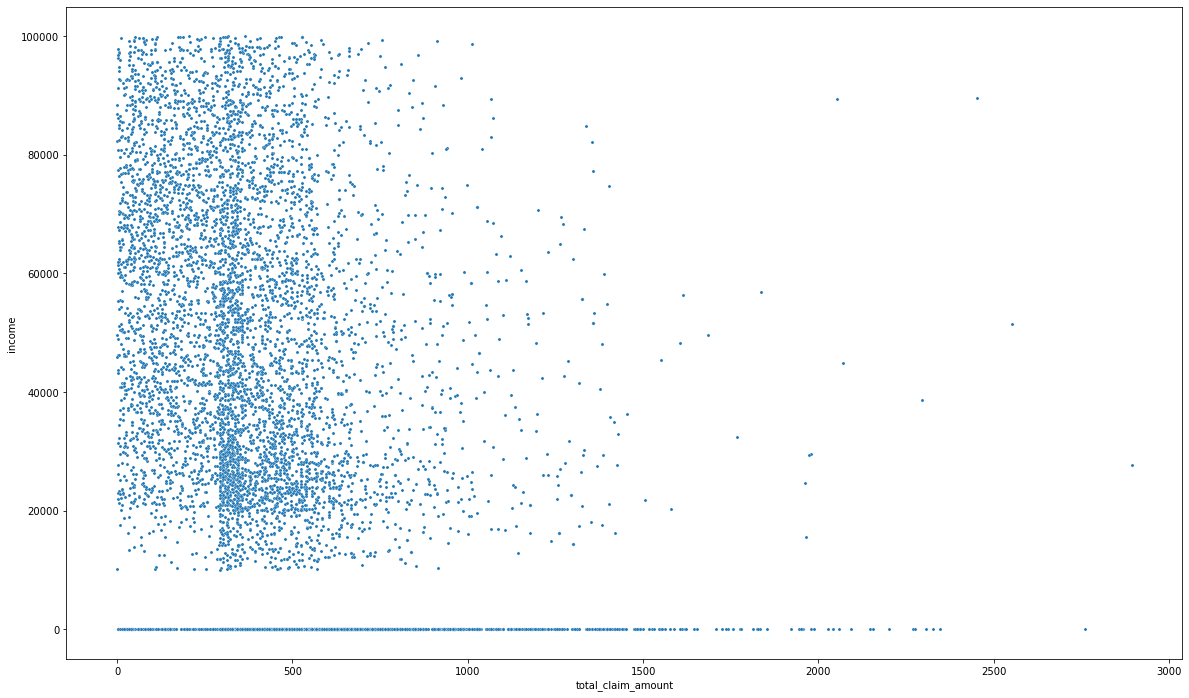

In [34]:
fig, ax = plt.subplots(figsize=(20,12))
sns.scatterplot(data=data,
                x='total_claim_amount',
                y='income', s=10
               )

Markersizes are too big. It seems we have overplotted!

<AxesSubplot:xlabel='total_claim_amount', ylabel='income'>

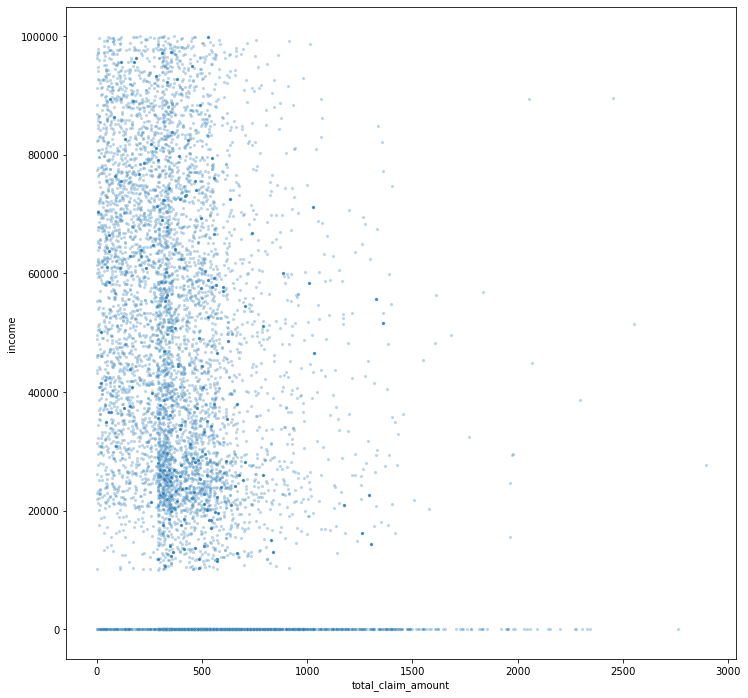

In [23]:
fig, ax = plt.subplots(figsize=(12,12))
sns.scatterplot(data=data,
                x='total_claim_amount',
                y='income',
                s=10,
                alpha=.3,
                ax=ax,
               )

And just by decreasing the markersize we found interesting features here, for example: Data seem to be more frequent near a total claim amount of 330. And also there seems to be a boundary regarding the income near 20,000$. These can be important leads for further data investigation (maybe not in this case, because these data might even be artificial). Let's mark those boundaries

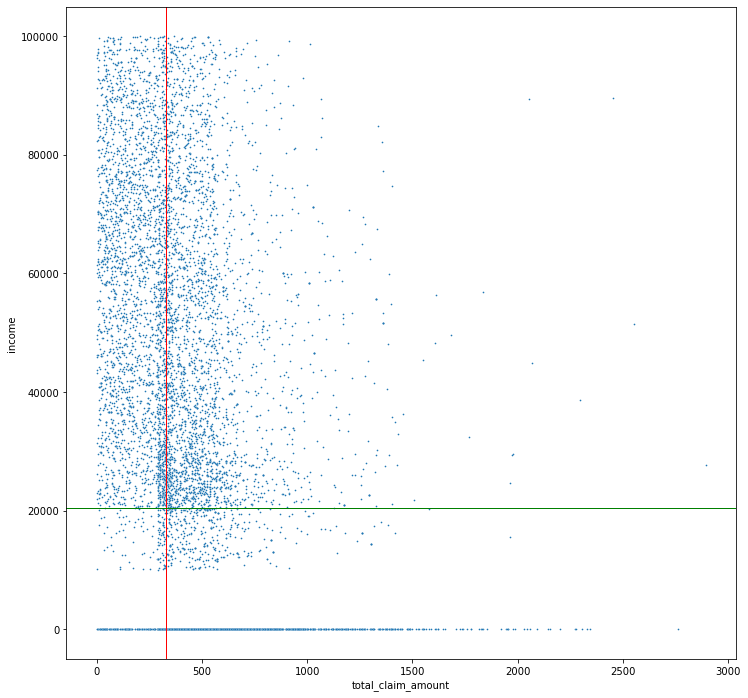

In [35]:
fig, ax = plt.subplots(figsize=(12,12))
sns.scatterplot(data=data,
                x='total_claim_amount',
                y='income',
                s=3,
                ax=ax,
               )
plt.axvline(x=330, linewidth=1, color='r')
plt.axhline(y=20500, linewidth=1, color='g')

Let's try another plot (if you google for something like "density plot seaborn", or look on https://www.python-graph-gallery.com/all-charts/ you'll find more)

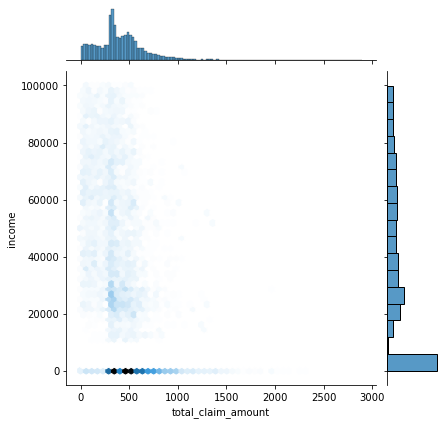

In [39]:
# this defines a dictionary which only contains settings to determine the hexagonal bin size of the
# following jointplot (play around with 'gridsize')
joint_kws=dict(gridsize=50)

sns.jointplot(data=data,
              x='total_claim_amount',
              y='income',
              kind='hex',  # provide the kind of jointplot
              joint_kws=joint_kws,  # parse the settings defined above 
             )

What we're trying to plot here is basically a 2-dimensional Histogram (check for example [here](https://www.python-graph-gallery.com/83-basic-2d-histograms-with-matplotlib) for more examples).

Let's do another one from **Matplotlib**: the `hist2d`, see the documentation [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist2d.html)

Text(0, 0.5, 'Income')

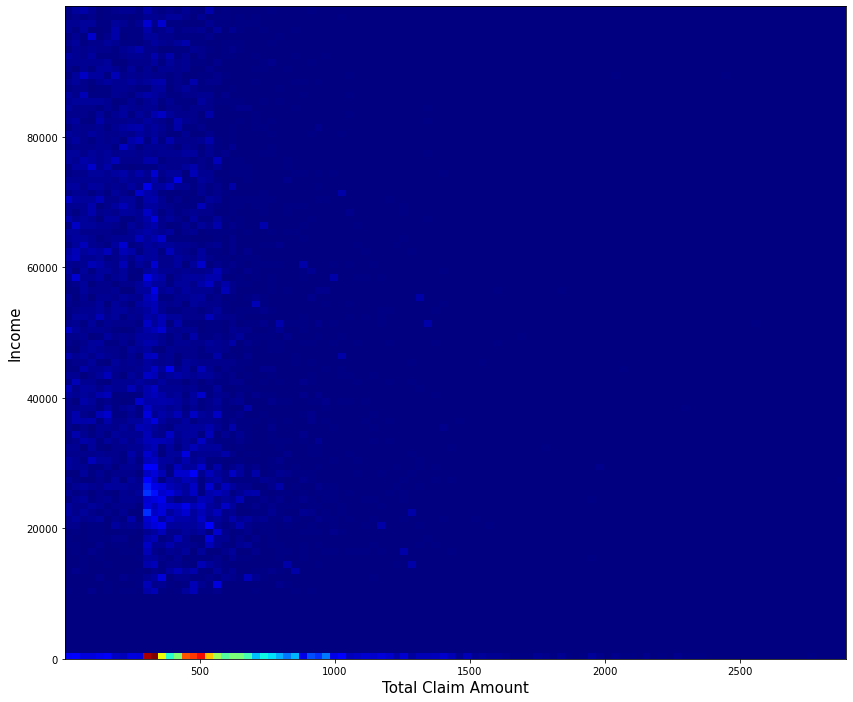

In [40]:
fig, ax = plt.subplots(figsize=(14,12))

ax = plt.hist2d(data['total_claim_amount'],
           data['income'],
           bins=(100,100),
           #density=True,
           cmap=plt.cm.jet,
          );
plt.xlabel('Total Claim Amount', size=15)
plt.ylabel('Income', size=15)

There are way more datapoints with Income = 0 than above. This is bad for our density plot, since its colorscale is set according to density. Let's therefore find a way to set the colorscale logarithmic. I just found this solution by googling, which led me to this [pyplot page](https://matplotlib.org/stable/gallery/scales/power_norm.html#sphx-glr-gallery-scales-power-norm-py). No one knows this from the top of their heads :-) And seaborn btw. has much handier solutions for this. Also later in the course, we will learn Tableau, where this is much easier to accomplish.

In [41]:
from matplotlib.colors import PowerNorm  # importing colormaps distributed according to a Powerlaw (not linear)
import matplotlib.colors as mcolors

Text(0, 0.5, 'Income')

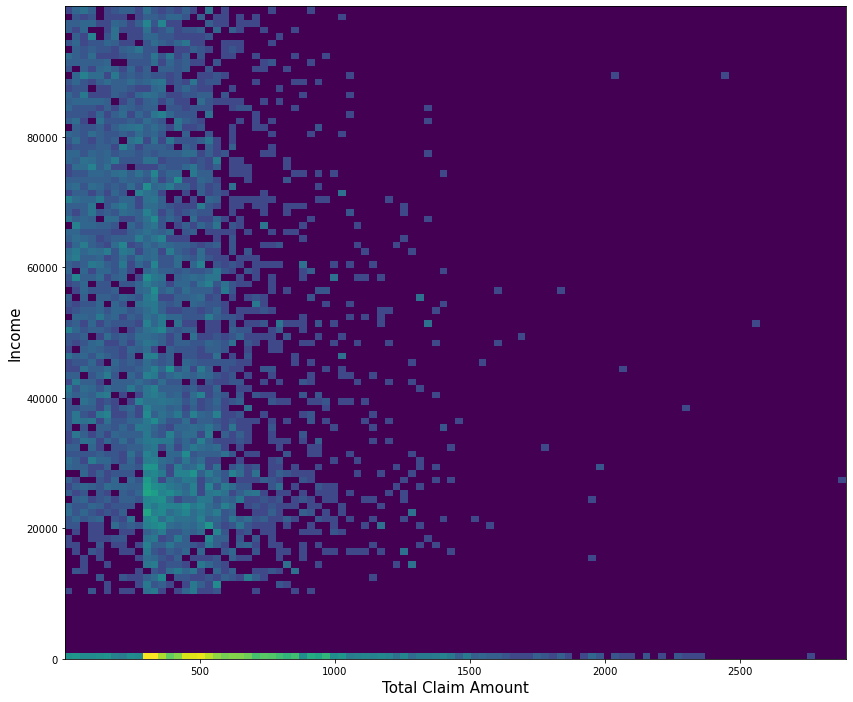

In [42]:
fig, ax = plt.subplots(figsize=(14,12))

ax = plt.hist2d(data['total_claim_amount'],
           data['income'],
           bins=(100,100),
           norm=mcolors.PowerNorm(0.3),  # set the power exponent to 0.3
                
          );
plt.xlabel('Total Claim Amount', size=15)
plt.ylabel('Income', size=15)

## Key takeaway here

* if you have lots of data to plot, definitely play around with the plot-style settings like **Markersize**, **alpha-level**, **logarithmic**-scaling, etc. ...  also try different kinds of density-plots.
* because if you don't, during your EDA process you might miss important leads which can lead to very relevant business insights!

# Solutions for Customer Analysis Round 4  <a class="anchor" id="car4"></a>

### some preparations

In [43]:
# 'effective_to_date' column must be datetime
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'], errors='coerce')

# drop 'vehicle_size'
data=data.drop(columns=['vehicle_size'])  # drop a column  (or multiple columns)

# drop rows with nan values
data=data.dropna()

# check that we don't have nan values anymore
data.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
dtype: int64

### get the numeric data

In [44]:
# most handy approach
numericals =data._get_numeric_data()

# but what also works:
# numericals =data.select_dtypes(np.number)

# show the first 5 rows
numericals.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


### get the categoricals

In [45]:
categoricals = data.select_dtypes(np.object)
categoricals.head()

<ipython-input-45-40bc8cf6ac51>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = data.select_dtypes(np.object)


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car


### check normality visually

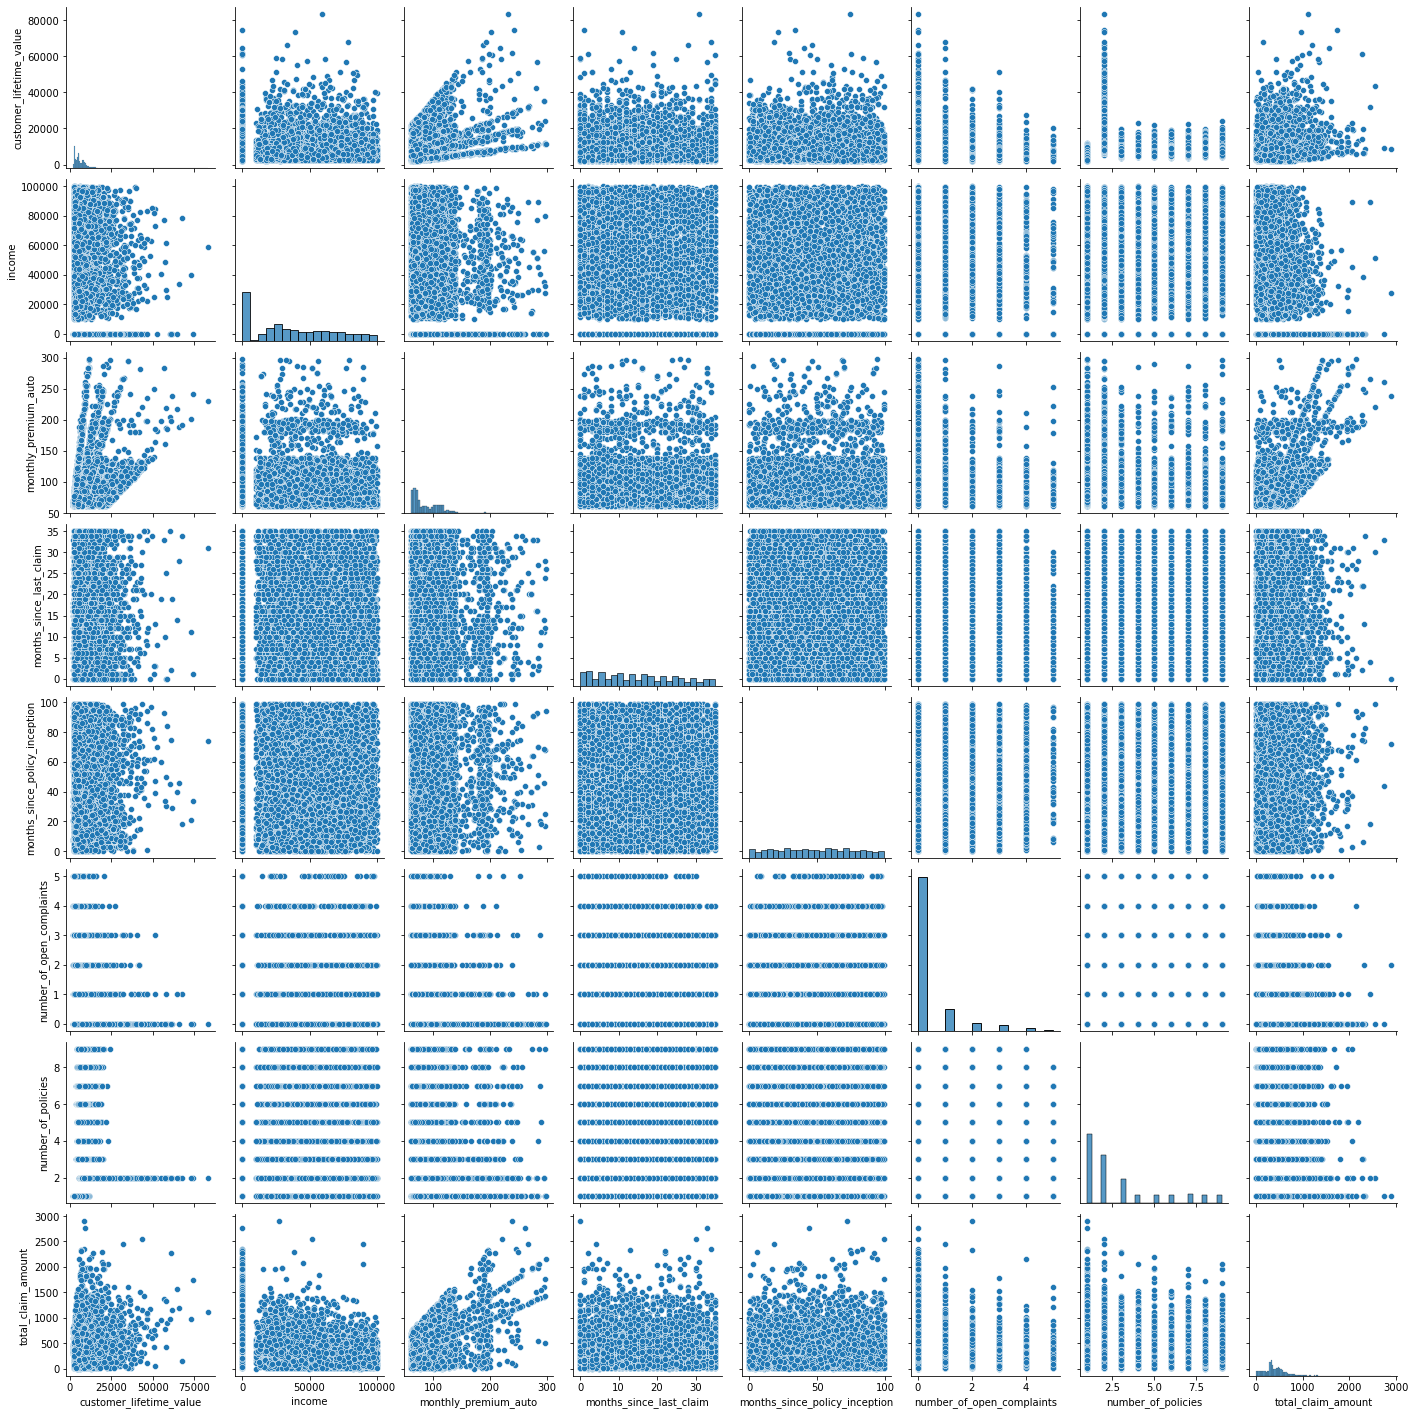

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# THIS CAN TAKE SOME TIME because it generates scatterplots pairwise between the variables
# so for n columns, expect n^2 plots. Depending on how fast your computer is, you may want to avoid this plot
# when it comes to > 10 numerical columns.

sns.pairplot(numericals)

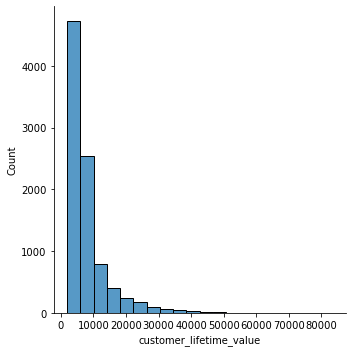

In [47]:
sns.displot(data['customer_lifetime_value'], bins=20)

do this for all numerical columns:

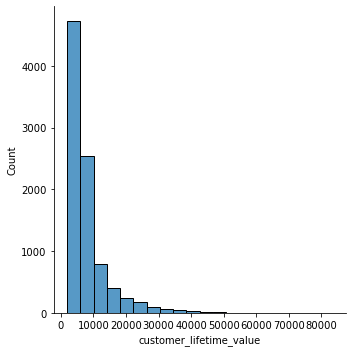

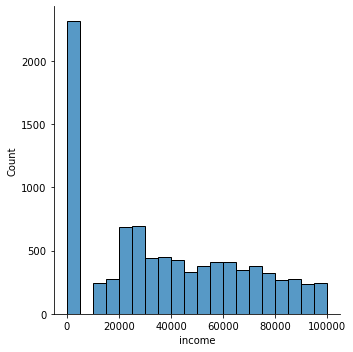

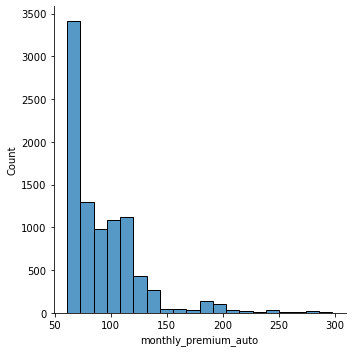

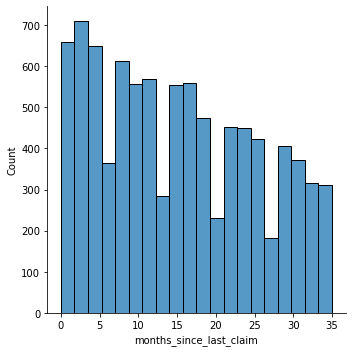

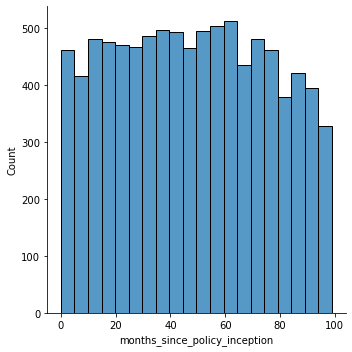

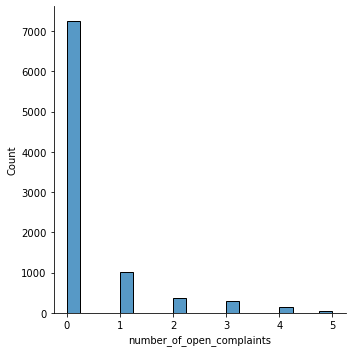

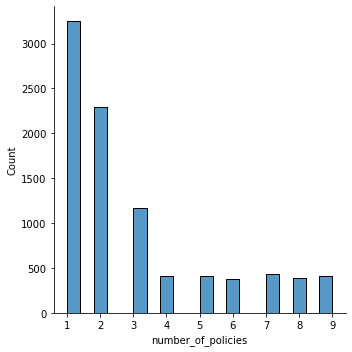

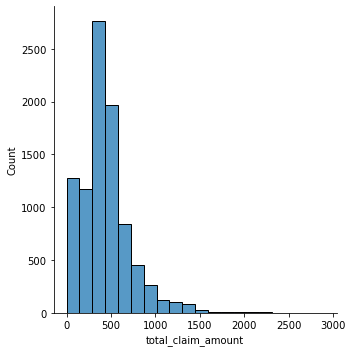

In [48]:
for col in numericals.columns:
    sns.displot(numericals[col], bins=20)
    plt.show()

### Check for multicolinearity

In [49]:
correlations = numericals.corr()
print(correlations)

                               customer_lifetime_value    income  \
customer_lifetime_value                       1.000000  0.024366   
income                                        0.024366  1.000000   
monthly_premium_auto                          0.396262 -0.016665   
months_since_last_claim                       0.011517 -0.026715   
months_since_policy_inception                 0.009418 -0.000875   
number_of_open_complaints                    -0.036343  0.006408   
number_of_policies                            0.021955 -0.008656   
total_claim_amount                            0.226451 -0.355254   

                               monthly_premium_auto  months_since_last_claim  \
customer_lifetime_value                    0.396262                 0.011517   
income                                    -0.016665                -0.026715   
monthly_premium_auto                       1.000000                 0.005026   
months_since_last_claim                    0.005026                

In [ ]:
# in the following, we want to create a heatmap, in which we plot all correlation coefficients between pairwise
# permutations of the numerical columns (correlating all columns with each other).

<AxesSubplot:>

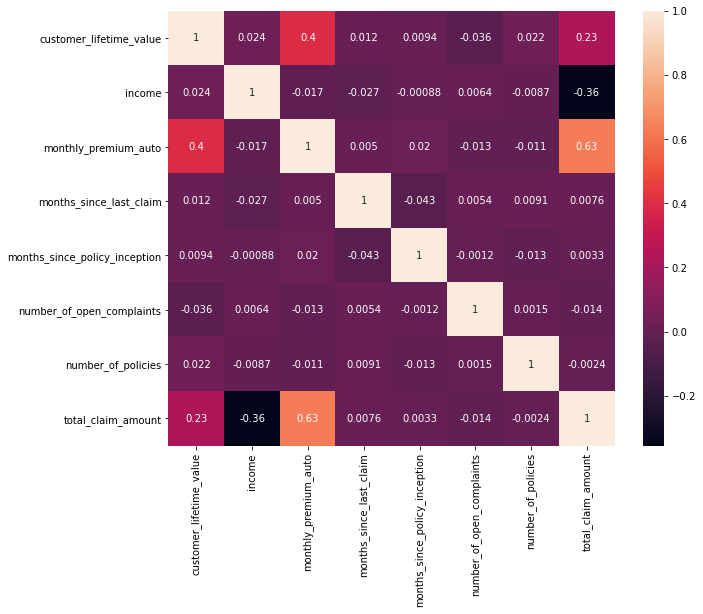

In [50]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(numericals.corr(),
            annot=True,
            ax=ax,
           )

**What is calculated here?**
`df.corr()` calculates (per default at least) the Pearson's correlation coefficient, pairwise between all columns of the dataframe `df` you run the function on. To have an overview of the degree of correlation between the columns is important when we later want to use some of them to build a model (for example with linear regression) to predict another (here maybe `customer_lifetime_value`). More of that in the upcoming lessons.

Back to the plot: We're only interested in the one direction correlation (column A with B), because the other direction (column B with A) yields the same value. So we only want to show the area below the main diagonal. To do that, we can define a mask of True/False values and pass that to the sns.heatmap(), telling the heatmap, which fields to "deactivate"

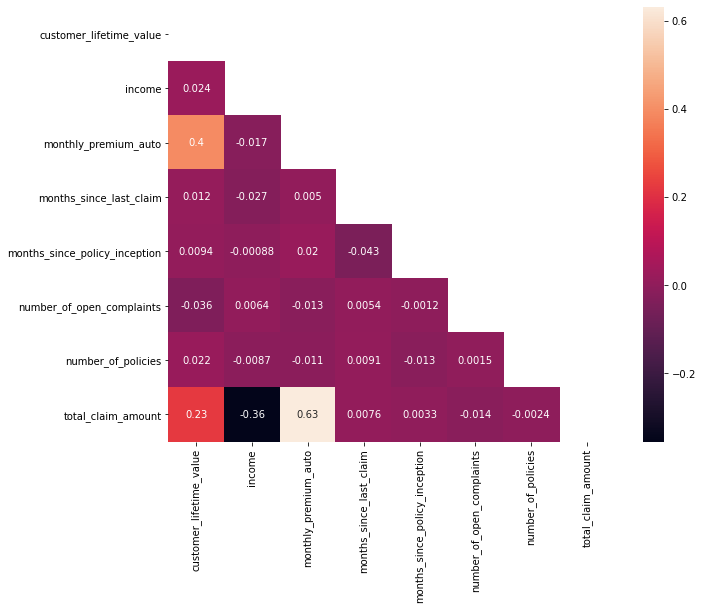

In [51]:
mask=np.zeros_like(numericals.corr())
mask[np.triu_indices_from(mask)]=True

# note we'll do the same heatmap plot again
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(numericals.corr(),
            mask=mask,  # "deactivates" all fields in our heatmap according to the mask
            annot=True,
            ax=ax,
                )
plt.show()

we also want to change the colorpalette into a **diverging** one (not a sequential one), since our values range from -1 to 1 and are not increasing from let's say 0 to possibly infinity. Check the colorpalettes of matplotlib you can use, [here](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)

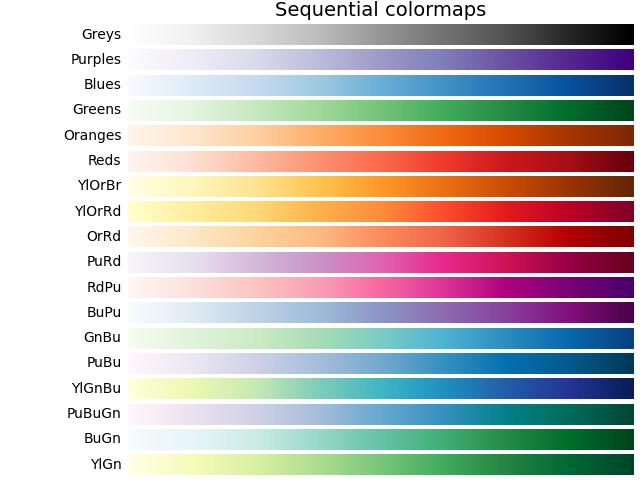

In [48]:
from IPython.display import display, Image

# We don't want one of these
display(Image('https://matplotlib.org/stable/_images/sphx_glr_colormaps_002.png'))

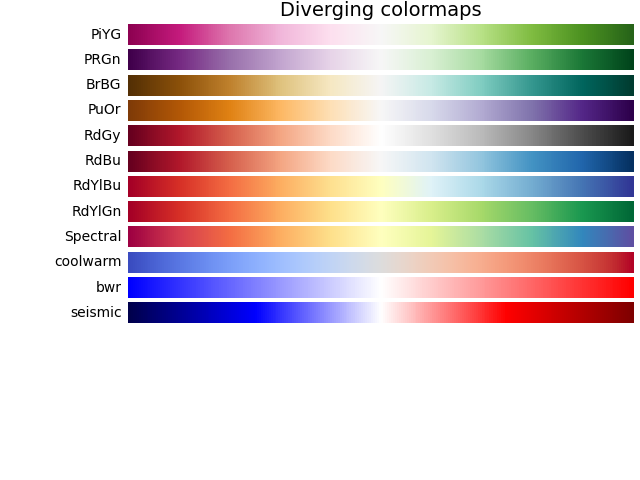

In [49]:
# but one of these:
display(Image('https://matplotlib.org/stable/_images/sphx_glr_colormaps_004.png'))

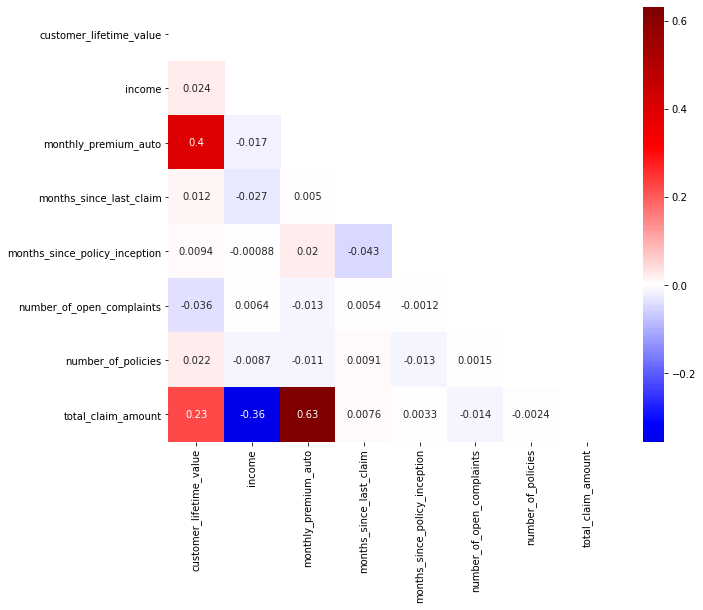

In [52]:
# let's pick seismic!
# and set the colormap so that r = 0.0 corresponds to ideal white

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(numericals.corr(),  # the data for the heatmap
            mask=mask,  # "deactivates" all fields in our heatmap according to the mask
            annot=True,  # show the actual values of correlation
            cmap='seismic',  # provide the 'seismic' colormap
            center=0,  # specify the value at which to center the colormap
           )
plt.show()

* we see a relatively high correlation between `monthly_premium_auto` and `customer_lifetime_value`, of **0.4**, as well as between `total_claim_amount` and `monthly_premium_auto` of **0.63**.
* **So, what next?**. Assume that we're employed by that insurance company and want to predict the Customer Lifetime value of a new customer based on customer data of customers that are already in our databas. So if in a next step (data modeling) `customer_lifetime_value` is the so called ("dependent") "target variable" that we want to predict in a linear regression model, and we find that the independent variables `total_claim_amount` and `monthly_premium_auto` are relatively high correlated, we might consider to drop one of the later before modeling , since they explain each other really well and one of them doesn't add much predictive power to our model. Even worse: They negatively influence the predictive power of each other with respect to the target. Think: Witnesses in a crime. In an ideal case, you want to have dream witnesses that each tell you different (true) things, and not multiple witnesses telling to similar information (high correlation) with respect to the suspect (the target variable) of said crime.
* but we will learn about that in later lessons in depth.

In [53]:
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car


In [55]:
#import the model
from sklearn import linear_model
#import evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
#first, we define the y or dependent variable we are seeking to predict (our label)
y = data['total_claim_amount']
#then we drop that column from the list of remaining columns (features) that we will feed into our model 
X = data.drop(['total_claim_amount'], axis=1)
#we define the model we will use - in this case LR
lm = linear_model.LinearRegression()


#model = lm.fit(X,y)
#lm.score(X,y)

In [58]:
categoricals = data.select_dtypes(np.object)
categoricals.head()

<ipython-input-58-40bc8cf6ac51>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = data.select_dtypes(np.object)


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car


In [59]:
numericals = data._get_numeric_data()
numericals.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


<AxesSubplot:xlabel='income'>

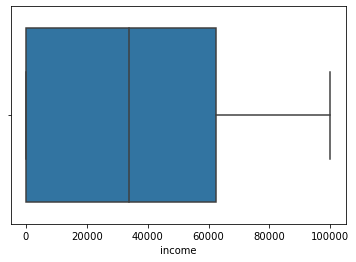

In [61]:
sns.boxplot(x=data['income'])

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

In [72]:
#step 2 divide the data into X and y
y = data['total_claim_amount']
data = data.drop(['total_claim_amount'], axis=1)

In [73]:
#step 3 split the data into numeric and categorical features for pre processing
X_num = data.select_dtypes(include = np.number)
X_cat = data.select_dtypes(include = np.object)
X_cat

<ipython-input-73-f3d128440172>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_cat = data.select_dtypes(include = np.object)


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car


In [74]:
#option 2 standardising all numeric features / rescaling using Standard Scaler
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(X_num)
x_standardized = transformer.transform(X_num)
print(x_standardized.shape)


(9134, 7)


In [75]:
#option 1 using OHE on categoricals
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(X_cat)
encoded = encoder.transform(X_cat).toarray()
encoded


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [79]:
X = pd.concat((x_standardized, encoded), axis=1)

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [80]:
#step 7 split the data into train and test randomly, as a %
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [82]:
#step 8 apply the machine learn model for It3 
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
r2_score(y_test, predictions)

0.769338827003328

In [83]:
mse = mean_squared_error(y_test, predictions)
print(mse)

18326.700457537365


In [84]:
import math 
rmse = math.sqrt(mse)
print(rmse)

135.37614434433183


In [85]:
r2 = r2_score(y_test, predictions)
r2

0.769338827003328